# Predict Bike Saring Demand Using AutoGluon Project
## AWS Machine Learning Engineer Nanodegree

## Step 1: Install Libraries

In [5]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install kaggle

In [4]:
!pip install autogluon --no-cache-dir

## Step 2: Download and Visualize Kaggle Data

In [1]:
username = "teweboteshome"
key = "022c5daa00b941e214b08e59729ff5c9"

In [2]:
import json
import os

# Create the .kaggle directory in the user's home directory
!mkdir -p ~/.kaggle

# Create the kaggle.json file
!touch ~/.kaggle/kaggle.json

# Set the correct permissions for the file
!chmod 600 ~/.kaggle/kaggle.json

kaggle_json_path = os.path.expanduser("~/.kaggle/kaggle.json")
kaggle_json_path

# Save API token the kaggle.json file
with open(kaggle_json_path, "w") as f:
    f.write(json.dumps({"username": username, "key": key}))

In [10]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|█████████████████████████████████████████| 189k/189k [00:00<00:00, 483MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [3]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [4]:
train = pd.read_csv("train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [14]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
test = pd.read_csv('test.csv')

In [16]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [18]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [20]:
test.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [9]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [10]:
test['datetime'] = pd.to_datetime(test['datetime'])

In [23]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [46]:
submission.shape

(6493, 2)

In [47]:
test.shape

(6493, 9)

In [25]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [26]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

## Step 3: Train a model using AutoGluon’s Tabular Prediction

In [7]:
train = train.drop(columns=['casual', 'registered'])

In [28]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [19]:
predictor = TabularPredictor(label="count").fit(
    train_data=train,
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250525_175711"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 19 16:54:57 UTC 2025
CPU Count:          2
Memory Avail:       1.55 GB / 3.76 GB (41.1%)
Disk Space Avail:   2.81 GB / 4.99 GB (56.3%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identi

In [34]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.072025  root_mean_squared_error      18.657630  410.078849                0.000671           0.037112            3       True         13
1   RandomForestMSE_BAG_L2  -53.380425  root_mean_squared_error      14.622281  328.016052                0.685052          40.110469            2       True         12
2          LightGBM_BAG_L2  -55.075484  root_mean_squared_error      14.191432  313.231096                0.254203          25.325513            2       True         11
3        LightGBMXT_BAG_L2  -60.260313  root_mean_squared_error      17.717704  344.605756                3.780474          56.700172            2       True         10
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.076785    0.043881   

/opt/conda/lib/python3.12/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.7165664781088,

In [35]:
performance = predictor.evaluate(train)

<frozen importlib._bootstrap>:488: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
/opt/conda/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/opt/conda/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the saf

In [36]:
performance

{'root_mean_squared_error': -76.6076355801159,
 'mean_squared_error': -5868.72982917584,
 'mean_absolute_error': -52.1016800819612,
 'r2': 0.8211314678192139,
 'pearsonr': 0.9398376510391084,
 'median_absolute_error': -30.454532623291016}

### Create predictions from test data

<Axes: xlabel='model'>

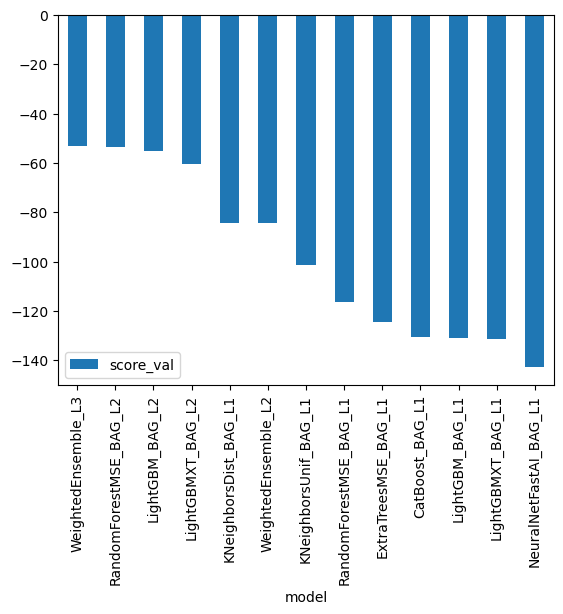

In [39]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [40]:
predictions = predictor.predict(test)

/opt/conda/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/opt/conda/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you t

In [43]:
predictions.describe()

count    6493.000000
mean      100.720795
std        89.932671
min         3.013077
25%        19.963785
50%        64.115982
75%       167.684631
max       366.459778
Name: count, dtype: float64

In [ ]:
predictions = [x if x > 0 else 0 for x in predictions]

In [48]:
submission["count"] = predictions

In [49]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,22.860924
1,2011-01-20 01:00:00,42.217987
2,2011-01-20 02:00:00,45.576500
3,2011-01-20 03:00:00,49.088364
4,2011-01-20 04:00:00,51.926411


In [50]:
submission.to_csv("submission.csv", index=False)

In [51]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 799kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
train.columns

## Step 4: Exploratory Data Analysis and Creating an additional feature

In [37]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count', 'year', 'month', 'day',
       'hour'],
      dtype='object')

<Axes: >

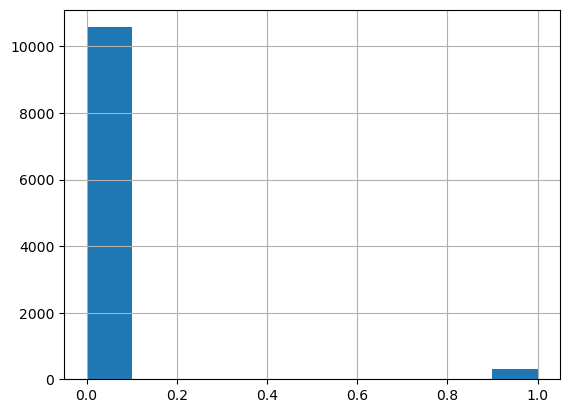

In [47]:
train.holiday.hist()

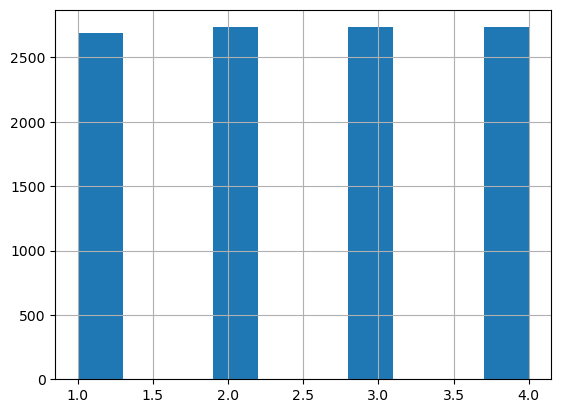

In [46]:
train.season.hist();

In [42]:
import matplotlib.pyplot as plt

<Axes: >

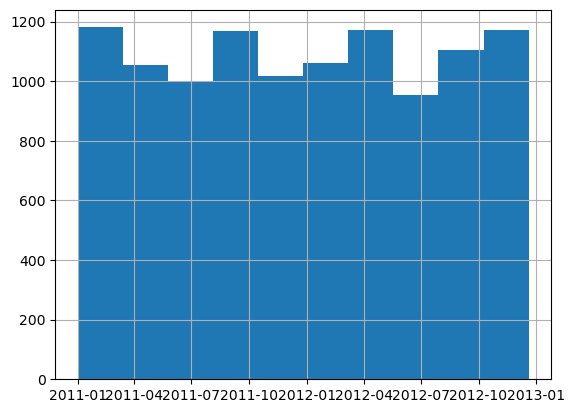

In [45]:
train.datetime.hist()

In [ ]:
train

In [15]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day

In [23]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day

In [24]:
test['hour'] = test['datetime'].dt.hour

In [16]:
train['hour'] = train['datetime'].dt.hour

In [17]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')

In [25]:
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [18]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


## Rerun the model with some additional data

In [ ]:
predictor_new_features = TabularPredictor(label="count").fit(
    train_data=train,
    time_limit=600,
    presets="best_quality"
)

In [29]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.392934  root_mean_squared_error      22.436333  402.082439                0.000833           0.053261            3       True         13
1          LightGBM_BAG_L2  -30.599871  root_mean_squared_error      20.778028  294.652712                0.315565          26.798710            2       True         10
2        LightGBMXT_BAG_L2  -31.247727  root_mean_squared_error      21.357724  300.774241                0.895261          32.920239            2       True          9
3          CatBoost_BAG_L2  -31.358366  root_mean_squared_error      20.527399  302.012052                0.064935          34.158049            2       True         12
4   RandomForestMSE_BAG_L2  -31.699138  root_mean_squared_error      21.159740  308.152180   

/opt/conda/lib/python3.12/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.453884062670745,
  'LightGBM_BAG_L1': -33.91733862651761,
  'RandomForestMSE_BAG_L1': -38.424983594881716,
  'CatBoost_BAG_L1': -34.7791938270235,
  'ExtraTrees

In [20]:
performance = predictor_new_features.evaluate(train)

<Axes: xlabel='model'>

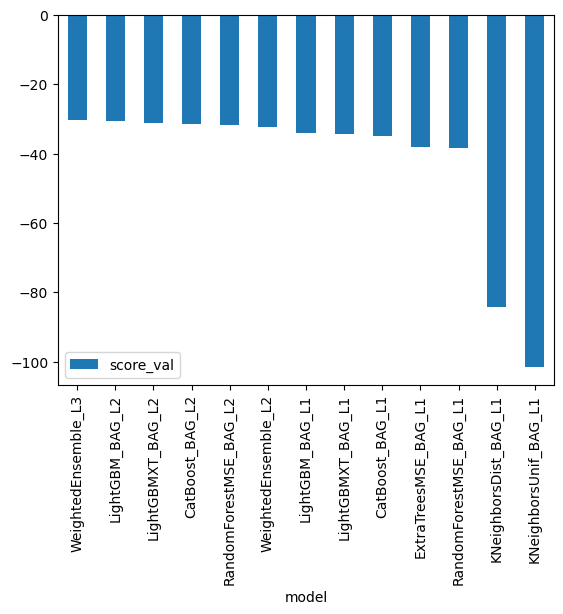

In [21]:
predictor_new_features.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [26]:
predictions = predictor_new_features.predict(test)

In [ ]:
predictions = [x if x > 0 else 0 for x in predictions]

In [27]:
predictions.describe()

count    6493.000000
mean      164.369553
std       145.819382
min         2.454035
25%        49.143314
50%       126.886490
75%       234.580353
max       822.802246
Name: count, dtype: float64

In [30]:
submission.columns

Index(['datetime', 'count'], dtype='object')

In [32]:
submission_new_features = pd.read_csv('sampleSubmission.csv')
submission_new_features["count"] = predictions

In [33]:
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,15.622458
1,2011-01-20 01:00:00,10.282963
2,2011-01-20 02:00:00,9.400211
3,2011-01-20 03:00:00,8.418407
4,2011-01-20 04:00:00,7.253578


In [34]:
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [35]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 729kB/s]
Successfully submitted to Bike Sharing Demand

In [36]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description           status                     publicScore  privateScore  
---------------------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-05-25 18:32:44.883000  new features          SubmissionStatus.COMPLETE  0.60985      0.60985       
submission.csv               2025-05-25 16:59:55.580000  first raw submission  SubmissionStatus.COMPLETE  1.80136      1.80136       


## Change Hyperparameters

In [48]:
TabularPredictor?

Init signature:
TabularPredictor(
    label: 'str',
    problem_type: 'str' = None,
    eval_metric: 'str | Scorer' = None,
    path: 'str' = None,
    verbosity: 'int' = 2,
    log_to_file: 'bool' = False,
    log_file_path: 'str' = 'auto',
    sample_weight: 'str' = None,
    weight_evaluation: 'bool' = False,
    groups: 'str' = None,
    positive_class: 'int | str | None' = None,
    **kwargs,
)
Docstring:     
AutoGluon TabularPredictor predicts values in a column of a tabular dataset (classification or regression).

Parameters
----------
label : str
    Name of the column that contains the target variable to predict.
problem_type : str, default = None
    Type of prediction problem, i.e. is this a binary/multiclass classification or regression problem (options: 'binary', 'multiclass', 'regression', 'quantile').
    If `problem_type = None`, the prediction problem type is inferred based on the label-values in provided dataset.
eval_metric : str or Scorer, default = None
    Metric

In [50]:
predictor_new_hpo = TabularPredictor(label='count').fit(
    train_data=train,
    hyperparameters={
        'RF': {'n_estimators': 300, 'max_depth': 15},
        'XGB': {'learning_rate': 0.05, 'max_depth': 8},
        'CAT': {'iterations': 1000, 'learning_rate': 0.03},
        'NN_TORCH': {'num_epochs': 20},
    }
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250525_190231"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 19 16:54:57 UTC 2025
CPU Count:          2
Memory Avail:       1.28 GB / 3.76 GB (34.1%)
Disk Space Avail:   1.82 GB / 4.99 GB (36.6%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'        

In [51]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -34.516079  root_mean_squared_error       0.242457  36.040129                0.000600           0.012527            2       True          5
1              XGBoost -35.266885  root_mean_squared_error       0.081628   2.916679                0.081628           2.916679            1       True          3
2         RandomForest -39.033930  root_mean_squared_error       0.143560  12.086176                0.143560          12.086176            1       True          1
3             CatBoost -39.290401  root_mean_squared_error       0.004357   7.440912                0.004357           7.440912            1       True          2
4       NeuralNetTorch -56.947295  root_mean_squared_error       0.012312  13.583836                0.012312          13.58

/opt/conda/lib/python3.12/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'RandomForest': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'RandomForest': -39.03392978800655,
  'CatBoost': -39.29040118404546,
  'XGBoost': -35.26688527735163,
  'NeuralNetTorch': -56.94729494922701,
  'WeightedEnsemble_L2': -34.51607895628616},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'RandomForest': ['RandomForest'],
  'CatBoost': ['CatBoost'],
  'XGBoost': ['XGBoost'],
  'NeuralNetTorch': ['NeuralNetTorch'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'RandomForest': 12.086175680160522,
  'CatBoost': 7.440911769866943,
  'XGBoost': 2.9166786670684814,
  'NeuralNetTorch': 13.58383560180664,
  'WeightedEnsemble_L2': 0.012526988983154297},
 'model_pred_times': {'RandomForest': 0.14356040954589844,
  'CatBoost': 0.004357099533081055,
  'XGBoost': 0.08162760734558105,
  'NeuralN

In [52]:
performance_hyp = predictor_new_hpo.evaluate(train)

In [53]:
performance_hyp

{'root_mean_squared_error': -17.989907601721317,
 'mean_squared_error': -323.6367755184705,
 'mean_absolute_error': -11.126336251000353,
 'r2': 0.9901361465454102,
 'pearsonr': 0.9951716610951991,
 'median_absolute_error': -6.512447357177734}

In [54]:
predictions_hyp = predictor_new_hpo.predict(test)
predictions_hyp

0        14.490215
1         4.764307
2         0.785205
3         2.291381
4         2.429413
           ...    
6488    359.103973
6489    236.714493
6490    157.545593
6491    101.249710
6492     58.337029
Name: count, Length: 6493, dtype: float32

In [59]:
predictions_hyp = [x if x > 0 else 0 for x in predictions_hyp]

In [61]:
submission_new_hpo = pd.read_csv('sampleSubmission.csv')


submission_new_hpo["count"] = predictions_hyp
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [62]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 242k/242k [00:00<00:00, 931kB/s]
Successfully submitted to Bike Sharing Demand

In [63]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-05-25 19:13:47.703000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.51037      0.51037       
submission_new_features.csv  2025-05-25 18:32:44.883000  new features                       SubmissionStatus.COMPLETE  0.60985      0.60985       
submission.csv               2025-05-25 16:59:55.580000  first raw submission               SubmissionStatus.COMPLETE  1.80136      1.80136       


##                                     ~~~~~Finished~~~~~~~~